## Chankong and Haimes function 

Problem taken from \[Chankong, Vira; Haimes, Yacov Y. (1983). Multiobjective decision making. Theory and methodology. ISBN 0-444-00710-5.\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 2 + (x_1 - 2)^2 + (x_2 - 1)^2$

$f_2 (x_1,x_2) = 9 x_1 - (x_2 - 1)^2$

*subjected to*

$x_1^2 + x_2^2 \le 225$

$x_1 - 3 x_2 + 10 \ge 0.0$

*in the domain*

$-20 \le x_1,x_2 \le 20$

In [1]:
from mosa import Anneal
from time import time
from math import inf
%matplotlib inline

### Translates the Chankong and Haimes problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the objective functions to be minimized. 

The argument of the Python function is a dictionary with just one key, $X$, representing a trial solution to the problem. 

The constraints are defined as $c_1$ and $c_2$. If they are not fulfilled, infinity is assigned to $f_1$ and $f_2$.

In [2]:
def fobj(solution):
    f1=2.0+pow((solution["X"][0]-2),2)+pow((solution["X"][1]-1),2)
    f2=9.0*solution["X"][0]-pow((solution["X"][1]-1),2)
    c1=pow(solution["X"][0],2)+pow(solution["X"][1],2)
    c2=solution["X"][0]-3.0*solution["X"][1]+10.0
    
    if c1>225.0 or c2>0.0:
        f1=inf
        f2=inf
    
    return f1,f2

### Initialization

First, an Anneal object is created.

Then, a population is defined. The population is a dictionary and its key $X$ is the same key that will be present in the trial solutions to the problem. 

In the case of the Chankong and Haimes problem, we used only one key because both $x_1$ and $x_2$ above are restricted to the same domain. Since the sample space is continuous for $X$ in the domain defined above, a tuple containing two values (i.e., the lower and upper bounds) is assigned to $X$.

In [3]:
opt=Anneal()
opt.archive_size=10000
opt.maximum_archive_rejections=10000

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
         Developed by Prof. Roberto Gomes         
   Universidade Federal do ABC (UFABC), Brazil    




In [4]:
opt.population={"X":(-20.0,20.0)}

### Hot run

A first run starting at very high temperature (1000.0) is performed. 

This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization process itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

In [5]:
opt.initial_temperature=1000.0
opt.number_of_iterations=1000
opt.number_of_temperatures=100
opt.temperature_decrease_factor=0.95
opt.number_of_solution_elements={"X":2}
opt.mc_step_size={"X":2.0}

In [6]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['X']:
        Number of elements in the solution: 2
        Continuous sample space
        Boundaries: (-20.0,20.0)
        Selection weight of this key: 1.000000
        Weight of 'change value' trial move: 1.000000
        Solution sorted after trial move: False
        Maximum step size to choose a new value in the solution: 2.000000
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1000.000000
    Number of accepted moves: 876.
    Fraction of accepted moves: 0.876000.
    Number of archive updates: 113.
    Fraction of archive updates in accepted moves: 0.128995.
------
TEMPERATURE: 950.000000
    Number of accepted moves: 916.
    Fraction of accepted moves: 0

    Number of accepted moves: 836.
    Fraction of accepted moves: 0.836000.
    Number of archive updates: 46.
    Fraction of archive updates in accepted moves: 0.055024.
------
TEMPERATURE: 142.395741
    Number of accepted moves: 846.
    Fraction of accepted moves: 0.846000.
    Number of archive updates: 34.
    Fraction of archive updates in accepted moves: 0.040189.
------
TEMPERATURE: 135.275954
    Number of accepted moves: 857.
    Fraction of accepted moves: 0.857000.
    Number of archive updates: 48.
    Fraction of archive updates in accepted moves: 0.056009.
------
TEMPERATURE: 128.512157
    Number of accepted moves: 852.
    Fraction of accepted moves: 0.852000.
    Number of archive updates: 52.
    Fraction of archive updates in accepted moves: 0.061033.
------
TEMPERATURE: 122.086549
    Number of accepted moves: 821.
    Fraction of accepted moves: 0.821000.
    Number of archive updates: 16.
    Fraction of archive updates in accepted moves: 0.019488.
------
TEMP

------
TEMPERATURE: 18.299584
    Number of accepted moves: 512.
    Fraction of accepted moves: 0.512000.
    Number of archive updates: 41.
    Fraction of archive updates in accepted moves: 0.080078.
------
TEMPERATURE: 17.384605
    Number of accepted moves: 523.
    Fraction of accepted moves: 0.523000.
    Number of archive updates: 46.
    Fraction of archive updates in accepted moves: 0.087954.
------
TEMPERATURE: 16.515374
    Number of accepted moves: 447.
    Fraction of accepted moves: 0.447000.
    Number of archive updates: 34.
    Fraction of archive updates in accepted moves: 0.076063.
------
TEMPERATURE: 15.689606
    Number of accepted moves: 429.
    Fraction of accepted moves: 0.429000.
    Number of archive updates: 45.
    Fraction of archive updates in accepted moves: 0.104895.
------
TEMPERATURE: 14.905125
    Number of accepted moves: 482.
    Fraction of accepted moves: 0.482000.
    Number of archive updates: 31.
    Fraction of archive updates in accepted mo

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front.

Solutions produced by the "hot run" were taken from the archive.

In [7]:
opt.initial_temperature=1.0
opt.number_of_solution_elements={"X":2}
opt.mc_step_size={"X":1.0}

In [8]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------
Keys in the population/solution dictionaries:
    ['X']:
        Number of elements in the solution: 2
        Continuous sample space
        Boundaries: (-20.0,20.0)
        Selection weight of this key: 1.000000
        Weight of 'change value' trial move: 1.000000
        Solution sorted after trial move: False
        Maximum step size to choose a new value in the solution: 1.000000
------
Initial solution loaded from the checkpoint file...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 92.
    Fraction of accepted moves: 0.092000.
    Number of archive updates: 27.
    Fraction of archive updates in accepted moves: 0.293478.
------
TEMPERATURE: 0.950000
    Number of accepted moves: 89.
    Fraction of accepted moves: 0.089000.
    Number of archive updates: 35.
    Fraction of archive updates in accepted moves: 0.393258.
------
TEMPERATURE: 0.902500
    Number of a

------
TEMPERATURE: 0.122087
    Number of accepted moves: 9.
    Fraction of accepted moves: 0.009000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.777778.
------
TEMPERATURE: 0.115982
    Number of accepted moves: 14.
    Fraction of accepted moves: 0.014000.
    Number of archive updates: 10.
    Fraction of archive updates in accepted moves: 0.714286.
------
TEMPERATURE: 0.110183
    Number of accepted moves: 11.
    Fraction of accepted moves: 0.011000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.636364.
------
TEMPERATURE: 0.104674
    Number of accepted moves: 13.
    Fraction of accepted moves: 0.013000.
    Number of archive updates: 8.
    Fraction of archive updates in accepted moves: 0.615385.
------
TEMPERATURE: 0.099440
    Number of accepted moves: 13.
    Fraction of accepted moves: 0.013000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.538462.


------
TEMPERATURE: 0.013452
    No move accepted.
------
TEMPERATURE: 0.012779
    No move accepted.
------
TEMPERATURE: 0.012140
    Number of accepted moves: 1.
    Fraction of accepted moves: 0.001000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 1.000000.
------
TEMPERATURE: 0.011533
    Number of accepted moves: 1.
    Fraction of accepted moves: 0.001000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 1.000000.
------
TEMPERATURE: 0.010957
    No move accepted.
------
TEMPERATURE: 0.010409
    Number of accepted moves: 3.
    Fraction of accepted moves: 0.003000.
    Number of archive updates: 3.
    Fraction of archive updates in accepted moves: 1.000000.
------
TEMPERATURE: 0.009888
    No move accepted.
------
TEMPERATURE: 0.009394
    No move accepted.
------
TEMPERATURE: 0.008924
    Number of accepted moves: 2.
    Fraction of accepted moves: 0.002000.
    Number of archive updates: 2.
    Fracti

### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [9]:
start=time()
pruned=opt.prunedominated()
opt.printx(pruned)
end=time()
print("   Elapsed time: %f s" % (end-start))

===
Solutions:
1) {'X': [-2.610953695820386, 4.33196270121196]}
2) {'X': [-2.610953695820386, 3.5113597514224035]}
3) {'X': [-2.610953695820386, 4.4687181974659795]}
4) {'X': [-2.610953695820386, 4.210917403328208]}
5) {'X': [-2.4442816680808472, 4.473816695066863]}
6) {'X': [-2.4442816680808472, 5.9802719943955225]}
7) {'X': [-2.4442816680808472, 7.356582038510586]}
8) {'X': [-2.383276128773044, 9.492447500965918]}
9) {'X': [-2.648515988338304, 10.459687040293918]}
10) {'X': [-2.636133173051389, 9.613826260488413]}
11) {'X': [-2.636133173051389, 9.298029658591753]}
12) {'X': [-2.636133173051389, 8.31609901433892]}
13) {'X': [-2.636133173051389, 6.632787127291099]}
14) {'X': [-2.636133173051389, 6.78398259345054]}
15) {'X': [-2.4922323939537865, 6.78398259345054]}
16) {'X': [-2.4922323939537865, 5.081900370735449]}
17) {'X': [-2.712060138033166, 4.447904288565384]}
18) {'X': [-2.4938230414768743, 4.787790092343609]}
19) {'X': [-2.5459433385996384, 7.779337919965766]}
20) {'X': [-2.3400

1033) {'X': [-2.451267287486727, 4.231415040976172]}
1034) {'X': [-2.451267287486727, 5.28580447294806]}
1035) {'X': [-2.446153913268495, 5.637008188316974]}
1036) {'X': [-2.446153913268495, 7.034776418835399]}
1037) {'X': [-2.446153913268495, 7.444082498799885]}
1038) {'X': [-2.446153913268495, 8.32655568963512]}
1039) {'X': [-2.3094630663987252, 5.504559886518322]}
1040) {'X': [-2.3198310446508903, 7.786731545476041]}
1041) {'X': [-2.5449161344131226, 7.739725906646285]}
1042) {'X': [-2.5449161344131226, 7.044650004289293]}
1043) {'X': [-2.3268062089749875, 7.239802540706887]}
1044) {'X': [-2.4243609303935263, 8.9877594532269]}
1045) {'X': [-2.454766897498948, 8.766596510029064]}
1046) {'X': [-2.454766897498948, 8.35969683966799]}
1047) {'X': [-2.4423523765065904, 8.35969683966799]}
1048) {'X': [-2.4423523765065904, 6.476609669768788]}
1049) {'X': [-2.4224359190528806, 5.013519682720042]}
1050) {'X': [-2.41112353730408, 5.013519682720042]}
1051) {'X': [-2.568902365582955, 3.263392839

1883) {'X': [-2.4707671331638887, 8.676419597540736]}
1884) {'X': [-2.4707671331638887, 8.609178039338389]}
1885) {'X': [-2.2387334382542177, 7.073116681959602]}
1886) {'X': [-2.2387334382542177, 7.380909202487499]}
1887) {'X': [-2.26117234398682, 10.699947170459886]}
1888) {'X': [-2.802718761139667, 9.909771159782172]}
1889) {'X': [-2.802718761139667, 9.934519612259932]}
1890) {'X': [-2.340487232341229, 8.546006281458485]}
1891) {'X': [-2.3588345351584006, 8.546006281458485]}
1892) {'X': [-2.3530223320211223, 8.546006281458485]}
1893) {'X': [-2.3530223320211223, 8.775149982016101]}
1894) {'X': [-2.3530223320211223, 6.827306099654606]}
1895) {'X': [-2.734836164066695, 7.707054841311898]}
1896) {'X': [-1.4029649335268477, 3.051579033292283]}
1897) {'X': [-1.3888811930153757, 3.0347488450052063]}
1898) {'X': [-2.383833771332064, 3.0347488450052063]}
1899) {'X': [-2.383833771332064, 4.848531652484665]}
1900) {'X': [-2.383833771332064, 6.928819575242532]}
1901) {'X': [-2.378769451034349, 7

2578) {'X': [-2.318274542869795, 10.18883012633319]}
2579) {'X': [-2.233617159204683, 3.123569677501191]}
2580) {'X': [-0.9852560696181474, 3.123569677501191]}
2581) {'X': [-2.487648739214718, 3.2557165535822694]}
2582) {'X': [-2.487648739214718, 4.272366325725577]}
2583) {'X': [-2.418387108598194, 4.272366325725577]}
2584) {'X': [-2.418387108598194, 3.9834086223207597]}
2585) {'X': [-2.504415710071, 3.9834086223207597]}
2586) {'X': [-2.504415710071, 4.397519518130327]}
2587) {'X': [-2.464832142038843, 4.763122536212418]}
2588) {'X': [-2.556326865015472, 4.887039425975614]}
2589) {'X': [-2.556326865015472, 4.697299878632165]}
2590) {'X': [-2.556326865015472, 5.736302215024128]}
2591) {'X': [-2.556326865015472, 6.965991082334089]}
2592) {'X': [-2.3242563810779777, 6.115509551494059]}
2593) {'X': [-2.5545678077194287, 3.2983792376235925]}
2594) {'X': [-2.5545678077194287, 4.022520627266447]}
2595) {'X': [-2.4737785296944557, 3.8711783984292514]}
2596) {'X': [-2.5323869241737147, 6.152589

3425) {'X': [-2.432996686734202, 5.577477125370139]}
3426) {'X': [-2.446193969293554, 5.577477125370139]}
3427) {'X': [-2.4634475933491666, 5.577477125370139]}
3428) {'X': [-2.3717947946872817, 5.525346476650797]}
3429) {'X': [-2.3717947946872817, 5.519919098760135]}
3430) {'X': [-2.3876807698821993, 5.519919098760135]}
3431) {'X': [-2.3876807698821993, 5.528204278629117]}
3432) {'X': [-2.3422441756919175, 5.528204278629117]}
3433) {'X': [-2.4361940630050816, 5.528204278629117]}
3434) {'X': [-2.4361940630050816, 5.534972909313692]}
3435) {'X': [-2.4361940630050816, 5.559756435775834]}
3436) {'X': [-2.4361940630050816, 5.581918272560341]}
3437) {'X': [-2.4381522586843496, 5.581918272560341]}
3438) {'X': [-2.464637117106496, 5.581918272560341]}
3439) {'X': [-2.4612536476150786, 5.581918272560341]}
3440) {'X': [-2.4612536476150786, 5.631556216671308]}
3441) {'X': [-2.4612536476150786, 5.6322381483847535]}
3442) {'X': [-2.4612536476150786, 5.6568900305531695]}
3443) {'X': [-2.4612536476150

718) [155.8054896399192, -156.05413008736855]
719) [189.15923737103986, -189.37643047283277]
720) [138.02386361822664, -138.2708265923304]
721) [141.76315502044199, -141.64485566532326]
722) [78.4981793735662, -78.74800988146595]
723) [85.78062715367977, -85.89551318180905]
724) [43.16247270345921, -43.409934368053186]
725) [35.94485474055557, -36.192316405149555]
726) [162.24117324155452, -162.48198793216093]
727) [141.0025658143312, -141.24338050493762]
728) [139.1660394521513, -139.3202350592829]
729) [191.40316068128942, -191.59897976913945]
730) [166.93227732431274, -167.12809641216276]
731) [70.97658929349015, -71.2261409717774]
732) [30.47004227043087, -30.68151683346698]
733) [28.649600643110738, -28.85914356859002]
734) [27.53570369101186, -27.745246616491144]
735) [30.535047633428494, -30.782538062416492]
736) [45.82127636582507, -46.068766794813065]
737) [25.78095518669349, -26.029107938359566]
738) [27.250918296749056, -27.48676160620002]
739) [27.587147875948517, -27.82299

1511) [104.58131610373536, -104.8289783796386]
1512) [60.75332303867515, -60.89700364586673]
1513) [79.8003415258777, -79.99344589807563]
1514) [91.73195107676459, -91.97976954948922]
1515) [111.79136631822303, -111.99921065970963]
1516) [79.56923311898635, -79.80584809604828]
1517) [93.88315947478736, -94.1197744518493]
1518) [190.31447088508008, -190.55957933922946]
1519) [211.88895853969004, -211.93272860027466]
1520) [60.959454404363655, -61.16100400200574]
1521) [62.738470865705, -62.940020463347075]
1522) [22.363039993281035, -22.484787482602393]
1523) [19.406273913459145, -19.1205567655911]
1524) [22.130094088811834, -22.18437382784404]
1525) [38.90334774573363, -39.104260555081105]
1526) [38.48562023275138, -38.70425196422437]
1527) [37.18338606547898, -37.39918909464487]
1528) [32.805137650272066, -33.020940679437956]
1529) [16.22697075510836, -14.713435389620686]
1530) [16.10850066513172, -14.594965299644047]
1531) [26.54672597463093, -26.795959551985625]
1532) [35.8353810492

2429) [149.1204551484837, -149.3691733345174]
2430) [147.74278273390053, -147.97869417026936]
2431) [145.6285272705828, -145.86443870695166]
2432) [134.03725036030022, -134.2461624838877]
2433) [106.99160227631437, -107.16014509124429]
2434) [110.656466715682, -110.90598523643663]
2435) [110.23310776339272, -110.48247705899435]
2436) [152.5258194348474, -152.7631689934096]
2437) [156.32804954377283, -156.56539910233505]
2438) [170.66638186723574, -170.90373142579796]
2439) [162.5158331944969, -162.75318275305912]
2440) [100.53539814337172, -100.71787204598954]
2441) [96.04713971563915, -96.27176857272588]
2442) [91.0115465303361, -91.2588132131776]
2443) [92.93561676293405, -93.1185764236555]
2444) [31.199227838133012, -31.44922021542589]
2445) [32.84951683804006, -33.09950921533293]
2446) [29.198426071428752, -29.448418448721625]
2447) [34.38931468168279, -34.63930705897567]
2448) [78.1000900342379, -78.3148015545016]
2449) [79.16816155574315, -79.32790948197419]
2450) [60.78577966675

3527) [44.629051397026444, -44.86762268078914]
3528) [44.51819458409279, -44.75919657635009]
3529) [44.560983590060545, -44.80108102033776]
3530) [44.60842273259156, -44.847467814528386]
3531) [44.62583656663822, -44.864881648575036]
3532) [44.46865662904824, -44.70770171098506]
3533) [44.44761786311555, -44.687136061066035]
3534) [44.889117833462976, -45.11658853964147]
3535) [44.95426845351304, -45.179588784541586]
3536) [46.01009797804216, -46.238038040713505]
3537) [45.99182883609292, -46.21976889876427]
3538) [45.9521640856679, -46.18721118297003]
3539) [45.99851077942451, -46.22897847840722]
3540) [45.93440791132724, -46.1667601540663]
3541) [45.93512114843716, -46.167559075779636]
3542) [45.4792508050881, -45.72235273856191]
3543) [45.57366019191143, -45.814947297910315]
3544) [45.57690468454157, -45.81819179054045]
3545) [45.5181272484764, -45.761898840150586]
3546) [45.537280892063876, -45.780718062896256]
3547) [45.82108386039062, -46.064521031223]
3548) [45.80393853015511, -

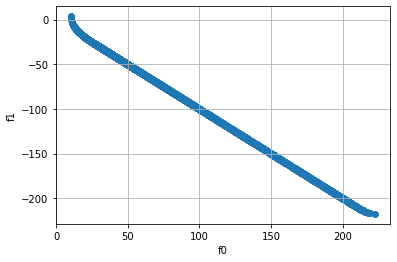

In [10]:
opt.plotfront(pruned)